In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter('ignore')
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from google.colab import files
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/grantwestfall/stat_482_project/main/Rookie_And_Career_Data.csv', encoding = 'unicode_escape')
dfRookie = pd.read_csv('https://raw.githubusercontent.com/justiincho/STAT482Dataset/main/data.csv', encoding = 'unicode_escape')

In [ ]:
df.head()
df.shape

(829, 62)

In [ ]:
df.columns
print(dfRookie.columns)

Index(['Player', 'Rook_Year', 'Rook_Age', 'Rook_FG_Percent', 'Rook_3P_Percent',
       'Rook_FT_Percent', 'Rook_MPG', 'Rook_PPG', 'Rook_RPG', 'Rook_APG'],
      dtype='object')


In [ ]:
#print(df.isna().sum().to_string())
print(dfRookie.isna().sum().to_string())

Player             0
Rook_Year          0
Rook_Age           0
Rook_FG_Percent    2
Rook_3P_Percent    6
Rook_FT_Percent    7
Rook_MPG           0
Rook_PPG           0
Rook_RPG           0
Rook_APG           0


In [ ]:
df[["3P_Percent", "FT_Percent", "FG_Percent", "2P_Percent", "eFG_Percent", "TS_Percent"]] = \
df[["3P_Percent", "FT_Percent", "FG_Percent", "2P_Percent", "eFG_Percent", "TS_Percent"]].fillna(0)

dfRookie[["Rook_3P_Percent", "Rook_FT_Percent", "Rook_FG_Percent"]] = \
dfRookie[["Rook_3P_Percent", "Rook_FT_Percent", "Rook_FG_Percent"]].fillna(0)

In [ ]:
df = df.dropna()

In [ ]:
career_stats = df[['WS', 'G', 'GS',
       'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG_Percent',
       '2P_Percent', '3P_Percent', 'FT_Percent', 'TS_Percent', 'eFG_Percent', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS_Per_48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'PER', 'ORB_Percent', 'DRB_Percent',
       'TRB_Percent', 'AST_Percent', 'STL_Percent', 'BLK_Percent',
       'TOV_Percent', 'USG_Percent']]

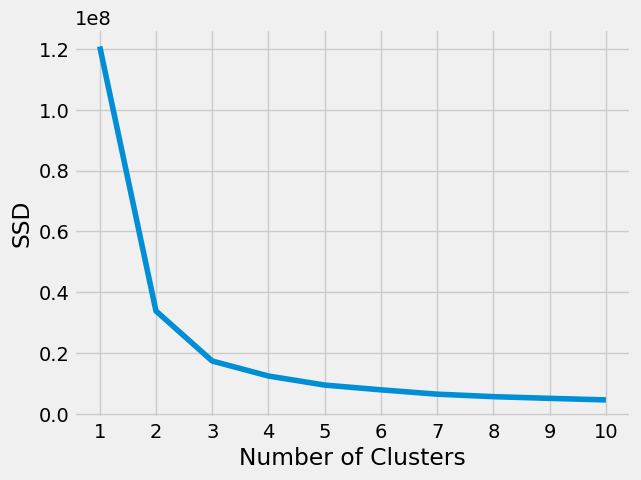

In [ ]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
   }
   
kmc = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_kmc = kmc.fit_predict(career_stats)
ssd = []
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(career_stats)
        ssd.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), ssd)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSD")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(career_stats)

In [ ]:
df["Cluster"] = kmeans.labels_

In [ ]:
cluster_summary = df.groupby(by = "Cluster").mean()[['WS', 'G','PTS', 'FG_Percent',
       '2P_Percent', '3P_Percent', 'FT_Percent', 'TS_Percent', 'eFG_Percent',
       'ORtg', 'DRtg', 'OWS', 'DWS', 'WS_Per_48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'PER']]

In [ ]:
cluster_summary

,WS,G,PTS,FG_Percent,2P_Percent,3P_Percent,FT_Percent,TS_Percent,eFG_Percent,ORtg,DRtg,OWS,DWS,WS_Per_48,OBPM,DBPM,BPM,VORP,PER
Cluster,,,,,,,,,,,,,,,,,,,
0,1.324600,86.442000,3.460000,0.405696,0.435858,0.200184,0.610606,0.469656,0.436626,94.470000,108.008000,0.305600,1.019400,0.016656,-3.611000,-0.802200,-4.413000,-0.209600,9.538400
1,62.697391,836.521739,13.767826,0.469435,0.502696,0.322061,0.769270,0.557357,0.517635,110.686957,107.469565,35.904348,26.794783,0.121565,0.951304,0.199130,1.147826,20.463478,16.816522
2,21.380383,529.191388,8.546890,0.457722,0.490029,0.290646,0.748694,0.540555,0.506407,107.478469,108.325359,10.630622,10.750718,0.088852,-0.857416,-0.132536,-0.992823,3.367464,13.576555


In [ ]:
print(f'{df.loc[df["Cluster"] == 0].sum()["G"]},\n{df.loc[df["Cluster"] == 1].sum()["G"]},\n{df.loc[df["Cluster"] == 2].sum()["G"]}')

43221,
96200,
110601


In [ ]:
df.value_counts("Cluster")

Cluster
0    500
2    209
1    115
dtype: int64

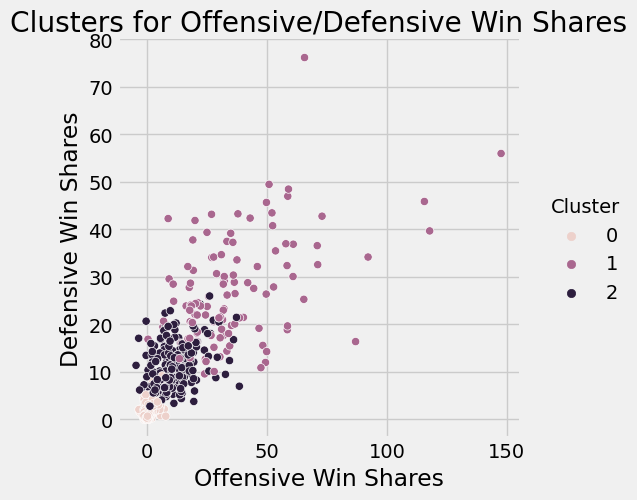

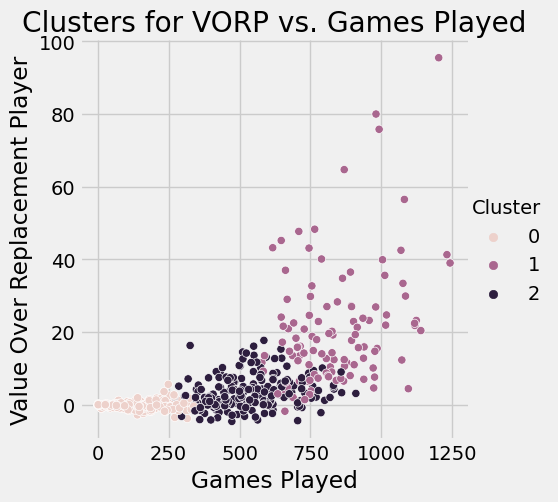

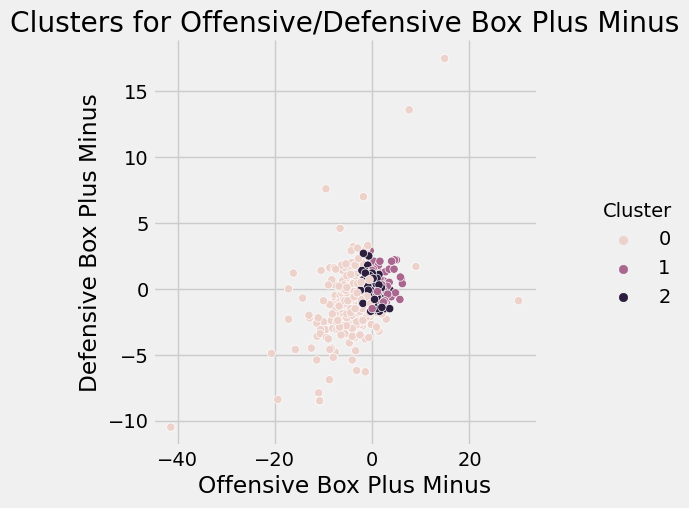

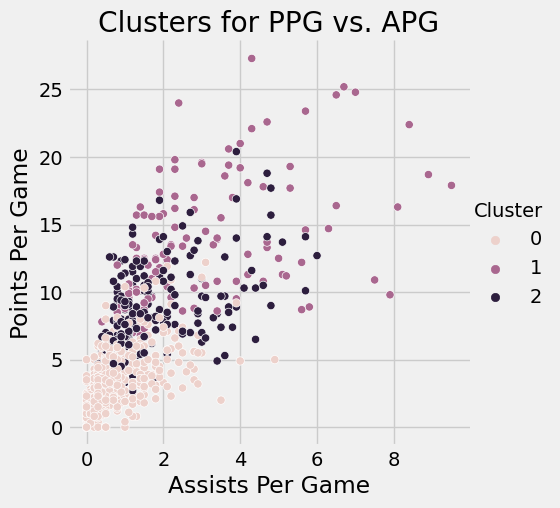

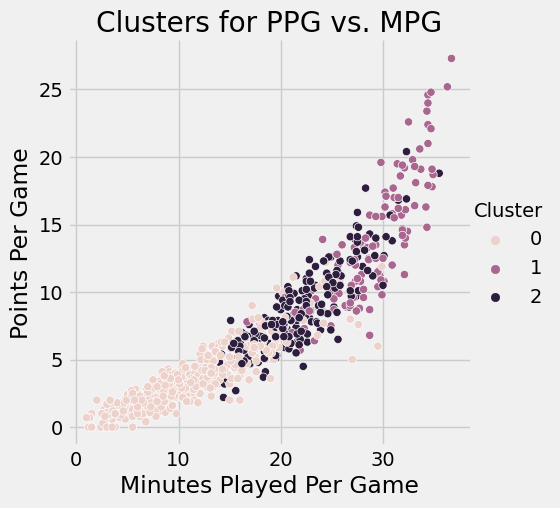

In [ ]:
sns.relplot(data = df, x = "OWS", y = "DWS", hue = "Cluster").set(xlabel = "Offensive Win Shares", ylabel = "Defensive Win Shares", 
                                                                  title = "Clusters for Offensive/Defensive Win Shares")
sns.relplot(data = df, x = "G", y = "VORP", hue = "Cluster").set(xlabel = "Games Played",ylabel = "Value Over Replacement Player", 
                                                                 title = "Clusters for VORP vs. Games Played")
sns.relplot(data = df, x = "OBPM", y = "DBPM", hue = "Cluster").set(xlabel = "Offensive Box Plus Minus", ylabel = "Defensive Box Plus Minus", 
                                                                    title = "Clusters for Offensive/Defensive Box Plus Minus")
sns.relplot(data = df, x = "AST", y = "PTS", hue = "Cluster").set(xlabel = "Assists Per Game", ylabel = "Points Per Game", title = "Clusters for PPG vs. APG")
sns.relplot(data = df, x = "MP", y = "PTS", hue = "Cluster").set(xlabel = "Minutes Played Per Game", ylabel = "Points Per Game", title = "Clusters for PPG vs. MPG")

[Text(0.5, 0, 'Win Shares'), Text(0.5, 1.0, 'Distribution of Win Shares')]

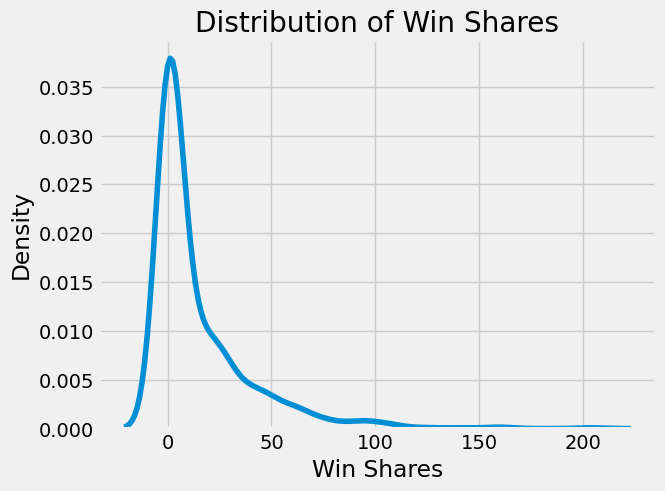

In [ ]:
sns.kdeplot(data = df, x = "WS").set(xlabel = "Win Shares", title = "Distribution of Win Shares")

[Text(0.5, 0, 'Points Per Game'), Text(0.5, 1.0, 'Distribution of PPG')]

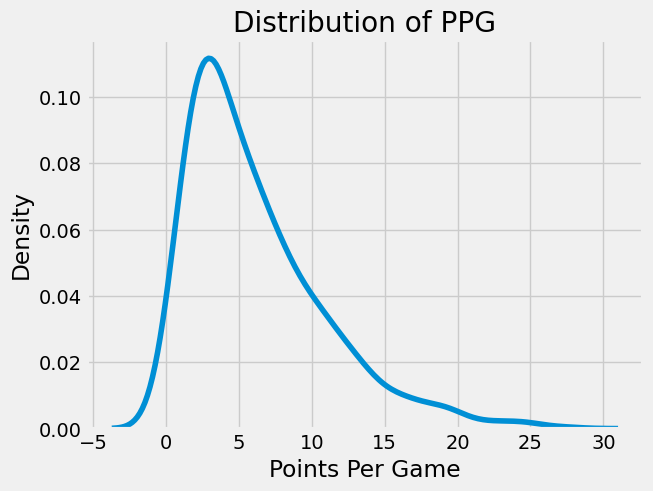

In [ ]:
sns.kdeplot(data = df, x = "PTS").set(xlabel = "Points Per Game", title = "Distribution of PPG")

In [ ]:
df.loc[df["Cluster"] == 2, "Player"].to_string()

"5              Andris Biedri?\x9a\n7                  Matt Bonner\n12              Josh Childress\n13               Nick Collison\n15              Carlos Delfino\n17                 Chris Duhon\n23                  Ben Gordon\n27              Kris Humphries\n30                  Royal Ivey\n38                Nenad Krsti?\n40            Shaun Livingston\n43              Andrés Nocioni\n50                Quinton Ross\n60           Sebastian Telfair\n63                  Beno Udrih\n64            Anderson Varejão\n66               Sasha Vuja?i?\n67                Delonte West\n68              Damien Wilkins\n69               Dorell Wright\n71               Alan Anderson\n75                Brandon Bass\n77              Andray Blatche\n80                Andrew Bynum\n81                  Will Bynum\n93            Francisco García\n94                  Ryan Gomes\n95                 Joey Graham\n97               Danny Granger\n99                Gerald Green\n102                Chuck Hayes\n103 

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

In [ ]:
X = df[['Rook_Age', 'Rook_FG_Percent', 'Rook_3P_Percent',
       'Rook_FT_Percent', 'Rook_MPG', 'Rook_PPG', 'Rook_RPG', 'Rook_APG', 'Rook_Year']]
Y = df['Cluster']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [ ]:
X_train_2, X_val, Y_train_2, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 123)

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=123)
    gb_clf.fit(X_train_2, Y_train_2)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_2, Y_train_2)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, Y_val)))

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_2, Y_train_2)
print(f"XGBoost score (validation): {xgb_clf.score(X_val, Y_val)}")

gb_clf_opt = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.25, max_features = 2, max_depth = 2, random_state = 123)
gb_clf_opt.fit(X_train_2, Y_train_2)
print(f"Optimized model accuracy score (testing): {gb_clf_opt.score(X_test, Y_test)}")

predictions = gb_clf_opt.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("Classification Report")
print(classification_report(Y_test, predictions))

Learning rate:  0.05
Accuracy score (training): 0.670
Accuracy score (validation): 0.642
Learning rate:  0.075
Accuracy score (training): 0.715
Accuracy score (validation): 0.636
Learning rate:  0.1
Accuracy score (training): 0.732
Accuracy score (validation): 0.613
Learning rate:  0.25
Accuracy score (training): 0.794
Accuracy score (validation): 0.682
Learning rate:  0.5
Accuracy score (training): 0.844
Accuracy score (validation): 0.659
Learning rate:  0.75
Accuracy score (training): 0.893
Accuracy score (validation): 0.653
Learning rate:  1
Accuracy score (training): 0.921
Accuracy score (validation): 0.624
XGBoost score (validation): 0.6416184971098265
Optimized model accuracy score (testing): 0.7016129032258065
Confusion Matrix:
[[142   2   9]
 [  9  11  16]
 [ 28  10  21]]
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       153
           1       0.48      0.31      0.37        36
           2       0.46 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report

X1 = df[['Rook_Age', 'Rook_FG_Percent', 'Rook_3P_Percent',
       'Rook_FT_Percent', 'Rook_MPG', 'Rook_PPG', 'Rook_RPG', 'Rook_APG', 'Rook_Year']]
Y1 = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)


rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)


print("Random Forest Accuracy:", accuracy)
print("Random Forest Precision:", precision)
print("Random Forest Recall:", recall)
print("Random Forest F1 Score:", f1)
print("Random Forest Mean Squared Error:", mse)
print("Random Forest R-squared Score:", r2)
print("Random Forest Confusion Matrix:")
print(cm)
print("Random Forest Classification Report:")
print(classification)


Random Forest Accuracy: 0.6787878787878788
Random Forest Precision: 0.6571813807107925
Random Forest Recall: 0.6787878787878788
Random Forest F1 Score: 0.6562287896187642
Random Forest Mean Squared Error: 0.9030303030303031
Random Forest R-squared Score: -0.21804399524375762
Random Forest Confusion Matrix:
[[87  0 10]
 [ 8  9  8]
 [22  5 16]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        97
           1       0.64      0.36      0.46        25
           2       0.47      0.37      0.42        43

    accuracy                           0.68       165
   macro avg       0.62      0.54      0.56       165
weighted avg       0.66      0.68      0.66       165



In [ ]:
rookieXPred = dfRookie[['Rook_Age', 'Rook_FG_Percent', 'Rook_3P_Percent',
       'Rook_FT_Percent', 'Rook_MPG', 'Rook_PPG', 'Rook_RPG', 'Rook_APG', 'Rook_Year']]
rookieCluster = rfc.predict(rookieXPred)

dfRookie['Predicted_Cluster'] = rookieCluster
dfRookie

,Player,Rook_Year,Rook_Age,Rook_FG_Percent,Rook_3P_Percent,Rook_FT_Percent,Rook_MPG,Rook_PPG,Rook_RPG,Rook_APG,Predicted_Cluster
0,Ochai Agbaji,2023,22,0.427,0.355,0.812,20.5,7.9,2.1,1.1,2
1,Patrick Baldwin Jr.,2023,20,0.394,0.381,0.667,7.3,3.9,1.3,0.4,0
2,Paolo Banchero,2023,20,0.427,0.298,0.738,33.8,20.0,6.9,3.7,1
3,Dominick Barlow,2023,19,0.535,0.000,0.720,14.6,3.9,3.6,0.9,2
4,MarJon Beauchamp,2023,22,0.395,0.331,0.730,13.5,5.1,2.2,0.7,0
...,...,...,...,...,...,...,...,...,...,...,...
80,Jalen Williams,2023,21,0.521,0.356,0.812,30.3,14.1,4.5,3.3,2
81,Jaylin Williams,2023,20,0.436,0.407,0.704,18.7,5.9,4.9,1.6,1
82,Jeenathan Williams,2023,23,0.615,0.375,0.667,25.4,10.6,3.0,2.0,2
83,Mark Williams,2023,21,0.637,0.000,0.691,19.3,9.0,7.1,0.4,0


In [ ]:
dfRookie[dfRookie["Predicted_Cluster"] == 1]

,Player,Rook_Year,Rook_Age,Rook_FG_Percent,Rook_3P_Percent,Rook_FT_Percent,Rook_MPG,Rook_PPG,Rook_RPG,Rook_APG,Predicted_Cluster
2,Paolo Banchero,2023,20,0.427,0.298,0.738,33.8,20.0,6.9,3.7,1
7,Malaki Branham,2023,19,0.440,0.302,0.829,23.5,10.2,2.7,1.9,1
29,RaiQuan Gray,2023,23,0.500,0.400,1.000,35.0,16.0,9.0,7.0,1
31,AJ Griffin,2023,19,0.465,0.390,0.894,19.5,8.9,2.1,1.0,1
33,Jaden Hardy,2023,20,0.438,0.404,0.823,14.8,8.8,1.9,1.4,1
43,Walker Kessler,2023,21,0.720,0.333,0.516,23.0,9.2,8.4,0.9,1
49,Bennedict Mathurin,2023,20,0.434,0.323,0.828,28.5,16.7,4.1,1.5,1
68,Jabari Smith Jr.,2023,19,0.408,0.307,0.786,31.0,12.8,7.2,1.3,1
81,Jaylin Williams,2023,20,0.436,0.407,0.704,18.7,5.9,4.9,1.6,1


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout

X1 = df[['Rook_Age', 'Rook_FG_Percent', 'Rook_3P_Percent',
       'Rook_FT_Percent', 'Rook_MPG', 'Rook_PPG', 'Rook_RPG', 'Rook_APG', 'Rook_Year']]
Y1 = df['Cluster'].astype(int)



x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state = 123)

neuralNetwork = Sequential()
neuralNetwork.add(Dense(256, input_shape = (9,), activation = 'relu'))
neuralNetwork.add(Dense(128, activation = 'relu'))
neuralNetwork.add(Dense(64, activation = 'relu'))
neuralNetwork.add(Dense(32, activation = 'relu'))
neuralNetwork.add(Dense(3, activation = 'sigmoid'))

neuralNetwork.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
neuralNetwork.fit(x_train, y_train, epochs = 150, batch_size = 32)

print()
neuralNetwork.evaluate(x_test, y_test)

Epoch 1/150
21/21 [==============================] - 2s 3ms/step - loss: 22.9545 - accuracy: 0.4704
Epoch 2/150
21/21 [==============================] - 0s 3ms/step - loss: 6.3985 - accuracy: 0.4598
Epoch 3/150
21/21 [==============================] - 0s 3ms/step - loss: 4.5756 - accuracy: 0.4901
Epoch 4/150
21/21 [==============================] - 0s 4ms/step - loss: 3.5844 - accuracy: 0.4082
Epoch 5/150
21/21 [==============================] - 0s 3ms/step - loss: 3.9068 - accuracy: 0.4659
Epoch 6/150
21/21 [==============================] - 0s 3ms/step - loss: 3.3799 - accuracy: 0.4704
Epoch 7/150
21/21 [==============================] - 0s 4ms/step - loss: 2.1161 - accuracy: 0.4492
Epoch 8/150
21/21 [==============================] - 0s 4ms/step - loss: 1.6309 - accuracy: 0.4932
Epoch 9/150
21/21 [==============================] - 0s 3ms/step - loss: 1.9858 - accuracy: 0.5448
Epoch 10/150
21/21 [==============================] - 0s 3ms/step - loss: 1.7208 - accuracy: 0.5235
Epoch 11

[0.7746710181236267, 0.6666666865348816]

In [ ]:
x_test_prediction = neuralNetwork.predict(x_test)
x_test_pred = np.argmax(x_test_prediction, axis = 1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

print(f'The accuracy is: {accuracy}.')
print(f'The precision is: {precision}.')
print(f'The recall is: {recall}.')

6/6 [==============================] - 0s 4ms/step
Confusion Matrix:
[[93  0 11]
 [ 9  2 15]
 [13  0 22]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       104
           1       1.00      0.08      0.14        26
           2       0.46      0.63      0.53        35

    accuracy                           0.71       165
   macro avg       0.76      0.53      0.51       165
weighted avg       0.76      0.71      0.67       165

The accuracy is: 0.7090909090909091.
The precision is: 0.7645212999560824.
The recall is: 0.7090909090909091.


In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report

X = df[['Rook_Age', 'Rook_FG_Percent', 'Rook_3P_Percent',
       'Rook_FT_Percent', 'Rook_MPG', 'Rook_PPG', 'Rook_RPG', 'Rook_APG', 'Rook_Year']]
y = df['Cluster']

encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

model = LogisticRegression(multi_class='ovr')
model.fit(X, y_enc)

y_pred = model.predict(X)

y_pred_dec = encoder.inverse_transform(y_pred)

accuracy = accuracy_score(y, y_pred_dec)
precision = precision_score(y, y_pred_dec, average='weighted')
confusion_mat = confusion_matrix(y, y_pred_dec)
classification = classification_report(y, y_pred_dec)


print("Logistic Regression Accuracy:", accuracy)
print("Precision:", precision)
print("Confusion Matrix:\n", confusion_mat)
print(classification)



Logistic Regression Accuracy: 0.6820388349514563
Precision: 0.6420423514032497
Confusion Matrix:
 [[470   4  26]
 [ 37  38  40]
 [132  23  54]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       500
           1       0.58      0.33      0.42       115
           2       0.45      0.26      0.33       209

    accuracy                           0.68       824
   macro avg       0.59      0.51      0.53       824
weighted avg       0.64      0.68      0.64       824

